SOLVING DATASET USING DATA AUGMENTATION AND REGULARIZATION CNN MODEL

IMPORT NECESSARY LIBRARIES:-

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets
print('Importing successfully done')

Importing successfully done


LOAD THE DATASET:-

In [2]:
# Load dataset

(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

In [3]:
# Summarize the dataset:

#Dataset Size: 70,000 grayscale images
#Image Dimensions: 28x28 pixels
#Categories: 10 different clothing items (e.g., shirts, pants, shoes)
#Training Set: 60,000 images
#Test Set: 10,000 images
#Labels: Integer labels (0-9) representing clothing categories
#Purpose: Serve as a more challenging alternative to the original MNIST dataset
#Usage: Benchmarking image classification algorithms
#Creator: Zalando
#Intended for: Machine learning and computer vision research

PRE-PROCESSING THE DATASET:-

In [4]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
test_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [7]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [8]:
train_images.shape, train_labels.shape,test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

DISPLAY IMAGES TO VERIFY THE DATA:-

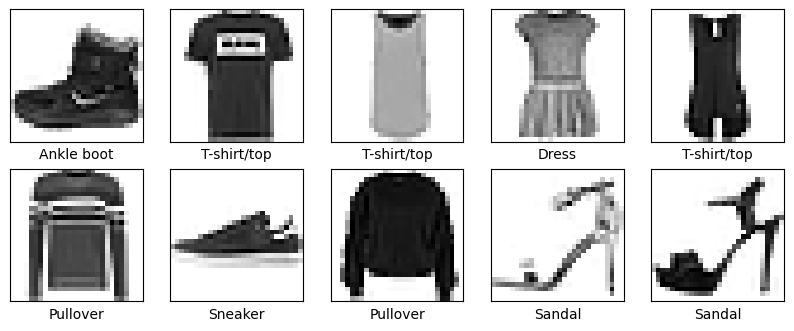

In [9]:
# Class names for Fashion-MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot a few random images from the training set
num_images = 10
plt.figure(figsize=(10, 10))
for i in range(num_images):
    plt.subplot(5,5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

FEATURE SCALING OF THE DATA :-

In [10]:
# Normalize the images to a range of 0 to 1

train_images = train_images / 255.0
test_images = test_images / 255.0

In [11]:
# Reshape the data to include the channel dimension

train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

DATA AUGMENTATION:-

In [12]:
# We import additional libraries

from tensorflow.keras.preprocessing.image import ImageDataGenerator
print('Importing successfully done')

Importing successfully done


In [13]:
# Data augmentation

datagen = ImageDataGenerator(rotation_range=10,width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True)
datagen.fit(train_images)

LOAD THE MODEL:-

In [14]:
# We import additional libraries

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
print('Importing successfully done')

Importing successfully done


CREATING SEQUENTIAL MODEL (CNN):-

In [15]:
# Build the model

model = Sequential()
model

<Sequential name=sequential, built=False>

BUILD AN IMPROVED CNN MODEL:-

In [16]:
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

C:\Users\torne\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


ADDING DENSE LAYERS:-

In [17]:
# Flatten the results to feed into a dense layer

model.add(layers.Flatten())

In [18]:
# Fully connected layer

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))

Regularization is achieved using dropout layers that can help prevent overfitting.

model.add(layers.Dropout(0.25))  # Add after convolutional layers
model.add(layers.Dropout(0.5))   # Add after fully connected layers

In [19]:
# Output layer

model.add(layers.Dense(10, activation='softmax'))

COMPILE THE MODEL:-

In [20]:
# Compile the model

model.compile(optimizer=Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [21]:
# Model Summary

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 197,482 (771.41 KB)

 Trainable params: 197,482 (771.41 KB)

 Non-trainable params: 0 (0.00 B)

TRAIN THE MODEL WITH DATA AUGMENTATION (CNN):-

In [22]:
# Train the model

history = model.fit(datagen.flow(train_images, train_labels, batch_size=64),
                    epochs=20,
                    validation_data=(test_images, test_labels))

Epoch 1/20


C:\Users\torne\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


938/938 ━━━━━━━━━━━━━━━━━━━━ 89s 89ms/step - accuracy: 0.5745 - loss: 1.1506 - val_accuracy: 0.7824 - val_loss: 0.5258
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 87ms/step - accuracy: 0.7577 - loss: 0.6366 - val_accuracy: 0.8331 - val_loss: 0.4493
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 85ms/step - accuracy: 0.7984 - loss: 0.5372 - val_accuracy: 0.8426 - val_loss: 0.4163
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 85ms/step - accuracy: 0.8179 - loss: 0.4916 - val_accuracy: 0.8699 - val_loss: 0.3595
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 79s 84ms/step - accuracy: 0.8318 - loss: 0.4515 - val_accuracy: 0.8779 - val_loss: 0.3363
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 85ms/step - accuracy: 0.8397 - loss: 0.4394 - val_accuracy: 0.8806 - val_loss: 0.3230
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 85ms/step - accuracy: 0.8494 - loss: 0.4128 - val_accuracy: 0.8810 - val_loss: 0.3289
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 79s 84ms/step - accuracy: 0.8530 - loss: 0.4030 - val_accurac

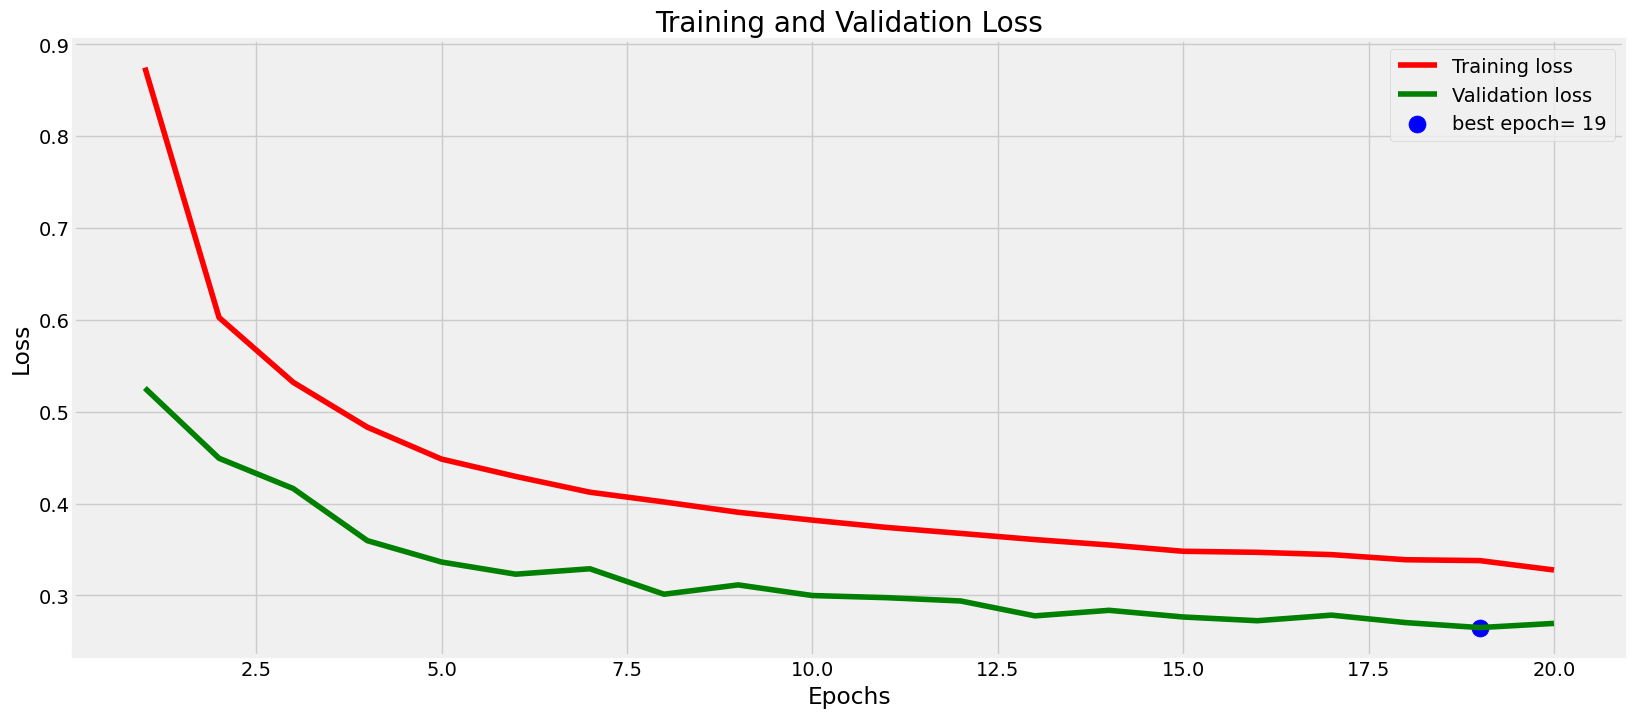

In [23]:
# Define needed variables
tr_loss = history.history['loss']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

Epochs = [i+1 for i in range(len(tr_loss))]
loss_label = f'best epoch= {str(index_loss + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout
plt.show()

In [24]:
# Accuracy score:

val_accuracy = np.max(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy', val_accuracy*100))


val_accuracy: 90.39%


EVALUATE THE MODEL (CNN):-

In [25]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9046 - loss: 0.2753
Test accuracy: 0.9014999866485596


PLOT TRAINING HISTORY:-

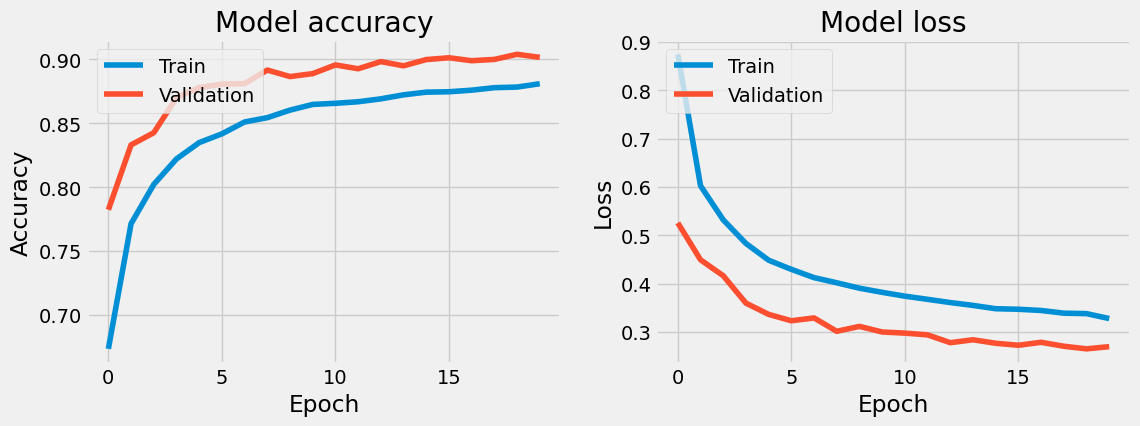

In [26]:
# Visualize training history

plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

The accuracy of your CNN model on the Fashion-MNIST dataset will depend on various factors including 
the specific architecture, the amount and type of data augmentation, and the hyperparameters used. 

Accordingly, the acuracy can vary as follows:
-Basic CNN Model: Around 88-90% accuracy
-With Data Augmentation and Dropout: Around 90-92% accuracy
-With Deeper Architecture and Learning Rate Scheduling: Around 91-93% accuracy

In [27]:
# Conclusion:

# We can see that the val_accuracy: 90.39%
# The CNN model for this dataset gives us a Test accuracy: 90.15%.
# In order to obtain the above result, the best epoch was 19th cycle which gave us the best result.